# **Imbalanced Data Analysis with Model Comparison**

## **1. Loading the Dataset**

In [48]:
import pandas as pd
# Loading the dataset
df = pd.read_csv('Preprocessed_cleaned_Final_dataset.csv')

# Dropping the unnecessary coloumns
df = df.drop(columns=['Content_int', 'tokens', 'clean_text', 'text_length'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14776 entries, 0 to 14775
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          14776 non-null  object
 1   IsHatespeech  14776 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 231.0+ KB


In [49]:
df.head()

,Text,IsHatespeech
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


## **2. Converting Text Data to Numerical Data**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Features and labels
X = df['Text']
y = df['IsHatespeech']

# Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorizing using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


## **3. Handling Imbalanced Data using SMOTE**

In [51]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to handle imbalanced data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)


## **4. Training Logistic Regression and Naive Bayes Models**

### **Logistic Regression**

#### **Description:** <br>
Logistic Regression is a linear classification algorithm that models the probability of a binary outcome based on one or more predictor variables. It uses the logistic function to map predicted values to probabilities, allowing it to classify data points into one of two categories. Despite its name, it is used for classification rather than regression tasks.

##### **Implementation**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Training the Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Evaluating the Logistic Regression model
print("Logistic Regression Model")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Model
[[2076  429]
 [ 224  227]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2505
           1       0.35      0.50      0.41       451

    accuracy                           0.78      2956
   macro avg       0.62      0.67      0.64      2956
weighted avg       0.82      0.78      0.79      2956



### **Naive Bayes**

#### **Description:** <br>
Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem, which describes the probability of an event based on prior knowledge of conditions related to the event. The **"naive"** part of the name comes from the assumption that the features are independent of each other, which simplifies the calculation. There are different variants of Naive Bayes classifiers, such as Multinomial, Bernoulli, and Gaussian, tailored to different types of data.

##### **Implementation**

In [53]:
from sklearn.naive_bayes import MultinomialNB

# Training the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluating the Naive Bayes model
print("Naive Bayes Model")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model
[[2012  493]
 [ 147  304]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2505
           1       0.38      0.67      0.49       451

    accuracy                           0.78      2956
   macro avg       0.66      0.74      0.67      2956
weighted avg       0.85      0.78      0.81      2956



## **Representing the metrics using Confusion Matrix**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

### **Plotting the Confusion Matrix**

In [55]:
# Plotting confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### **Confusion Matrix to represent Logistic Regression Model** 

Logistic Regression Model
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      2505
           1       0.35      0.50      0.41       451

    accuracy                           0.78      2956
   macro avg       0.62      0.67      0.64      2956
weighted avg       0.82      0.78      0.79      2956

Accuracy: 0.7790933694181326
Precision: 0.8176919088662706
Recall: 0.7790933694181326
F1 Score: 0.7948353187743539


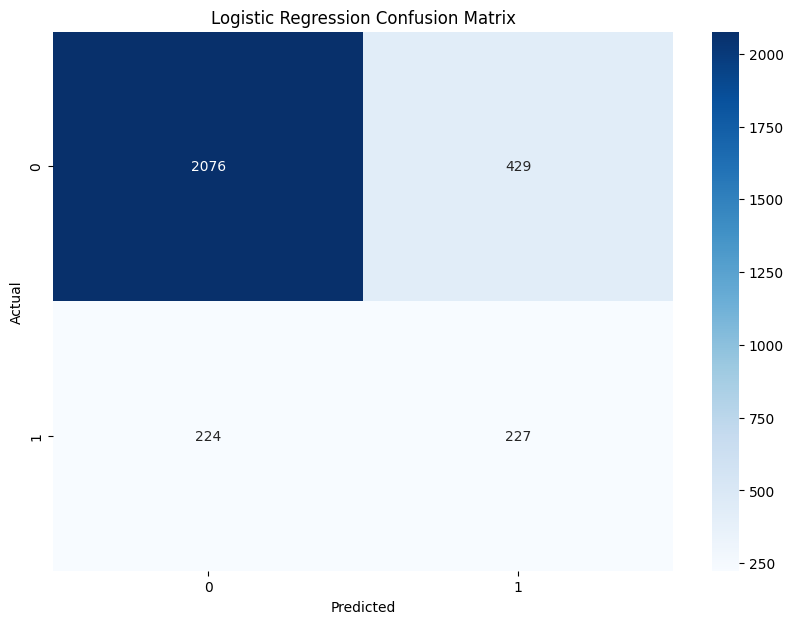

In [56]:
# Training and evaluation of Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)
print("Logistic Regression Model")
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_log_reg, average='weighted'))
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plot_confusion_matrix(cm_log_reg, "Logistic Regression")

### **Confusion Matrix to represent Naive Bayes Model** 

Naive Bayes Model
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      2505
           1       0.38      0.67      0.49       451

    accuracy                           0.78      2956
   macro avg       0.66      0.74      0.67      2956
weighted avg       0.85      0.78      0.81      2956

Accuracy: 0.7834912043301759
Precision: 0.8479252250810452
Recall: 0.7834912043301759
F1 Score: 0.805473162763739


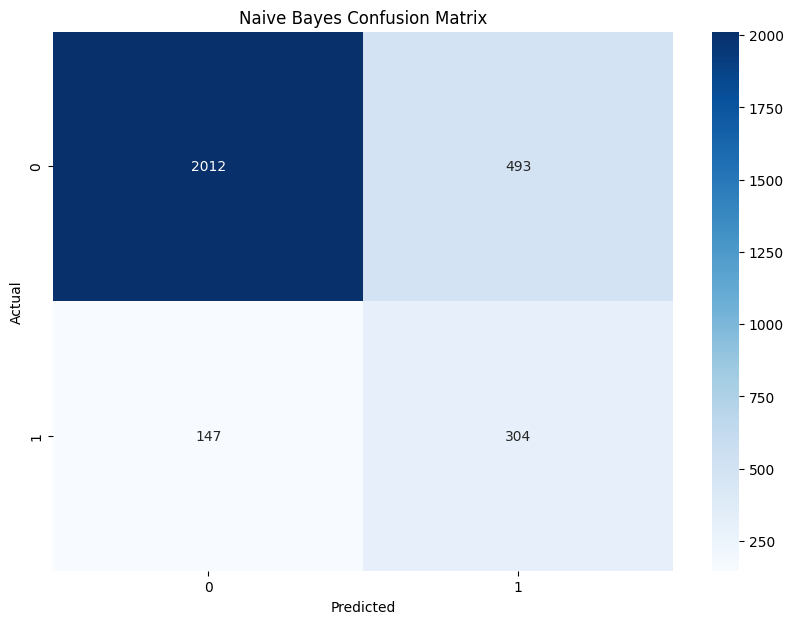

In [57]:
# Training and evaluation of Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_resampled, y_resampled)
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Model")
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
cm_nb = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(cm_nb, "Naive Bayes")

## **Analysis** 

#### **Naive Bayes Model Performance:**
**Accuracy:** 0.783 <br>
**Precision (weighted avg):** 0.848 <br>
**Recall (weighted avg):** 0.783 <br>
**F1 Score (weighted avg):** 0.805 <br>

#### **Logistic Regression Model Performance:**
**Accuracy:** 0.779 <br>
**Precision (weighted avg):** 0.818 <br>
**Recall (weighted avg):** 0.779 <br>
**F1 Score (weighted avg):** 0.795 <br>

## **Conclusion:**
Based on these metrics, **Naive Bayes** appears to be the better performing model for our project. It shows higher precision, recall, and F1 score compared to Logistic Regression. Moreover, Naive Bayes is known for its simplicity, fast training speed, and robust performance with text classification tasks, especially when assumptions about feature independence hold reasonably well.

##### **Naive Bayes Model Performance:**
**Accuracy:** 0.783 <br>
**Precision (weighted avg):** 0.848 <br>
**Recall (weighted avg):** 0.783 <br>
**F1 Score (weighted avg):** 0.805 <br>